### Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

### Data Overview

In [2]:
df = pd.read_csv('train-data.csv')
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
df.tail()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65
6018,6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,NaN,2.50


##### We will need fix the columns: 'Mileage', 'Power' e 'Engine'.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


### Data Cleaning

In [5]:
round((df.isna().sum()/len(df))*100,2)

Unnamed: 0            0.00
Name                  0.00
Location              0.00
Year                  0.00
Kilometers_Driven     0.00
Fuel_Type             0.00
Transmission          0.00
Owner_Type            0.00
Mileage               0.03
Engine                0.60
Power                 0.60
Seats                 0.70
New_Price            86.31
Price                 0.00
dtype: float64

##### Tivemos que excluir a coluna 'New_Price', pois apresentava 86.31% de colunas NaN(sem valores).

In [6]:
df.drop(columns = ['Unnamed: 0', 'New_Price'], inplace=True)

In [7]:
df.duplicated().sum()

0

In [8]:
df['Mileage'] = df['Mileage'].str.split(expand=True)[0].astype(float)
df['Engine'] = df['Engine'].str.split(expand=True)[0].astype(float)

In [9]:
(df['Power'] == 'null bhp').sum()

107

In [10]:
df['Power'] = df['Power'].replace('null bhp', None)
df['Power'] = df['Power'].str.split(expand=True)[0].astype(float)

In [11]:
df.sample(n=3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4938,Audi Q7 4.2 TDI Quattro Technology,Coimbatore,2015,56238,Diesel,Automatic,First,11.33,4134.0,335.20,7.0,51.69
1137,BMW 3 Series 320d Luxury Line,Jaipur,2013,62655,Diesel,Automatic,First,18.88,1995.0,184.00,5.0,14.50
4036,Maruti Ritz LDi,Kochi,2015,35314,Diesel,Manual,First,23.20,1248.0,73.94,5.0,4.27


In [12]:
df.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,6019.000000,6.019000e+03,6017.000000,5983.000000,5876.000000,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,18.134961,1621.276450,113.253050,5.278735,9.479468
std,3.269742,9.126884e+04,4.582289,601.355233,53.874957,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,72.000000,34.200000,0.000000,0.440000
25%,2011.000000,3.400000e+04,15.170000,1198.000000,75.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,18.150000,1493.000000,97.700000,5.000000,5.640000
75%,2016.000000,7.300000e+04,21.100000,1984.000000,138.100000,5.000000,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


In [13]:
df.select_dtypes('object').describe()

,Name,Location,Fuel_Type,Transmission,Owner_Type
count,6019,6019,6019,6019,6019
unique,1876,11,5,2,4
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First
freq,49,790,3205,4299,4929


##### Trating Outliers

In [14]:
for col in ['Engine','Power','Kilometers_Driven','Mileage','Price']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 2.5*IQR
    upper_bound = Q3 + 2.5*IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

### Feature Engineering

In [15]:
df['Name'].nunique()

1633

##### Creating a new columns: 'Company', 'Model' and discarting the column: 'Name'.

In [16]:
df['Company'] = df['Name'].str.split(expand=True)[0].str.lower()
df['Model'] = df['Name'].str.split().str[0:2].str.join(' ').str.lower()
df.drop(columns = ['Name'], inplace=True)

In [17]:
df['Company'].nunique(), df['Model'].nunique()

(26, 182)

### Univariate Analysis

In [18]:
def remove_outliers(df, col, lower, upper):
    df = df[ (df[col]>lower) & (df[col]<upper) ]
    return df

##### function ploting graphics.

In [19]:
def plot_num(df, col):
    fig, ax = plt.subplots(1,2,figsize=(16,4))
    sns.histplot(df, x=col, kde=True,ax=ax[0])
    sns.boxplot(df,x=col,ax=ax[1])
    ax[0].set_title(f'Distribution of {col}')
    ax[0].set_title(f'{col} Boxplot')
    fig.show()

##### 1. Year

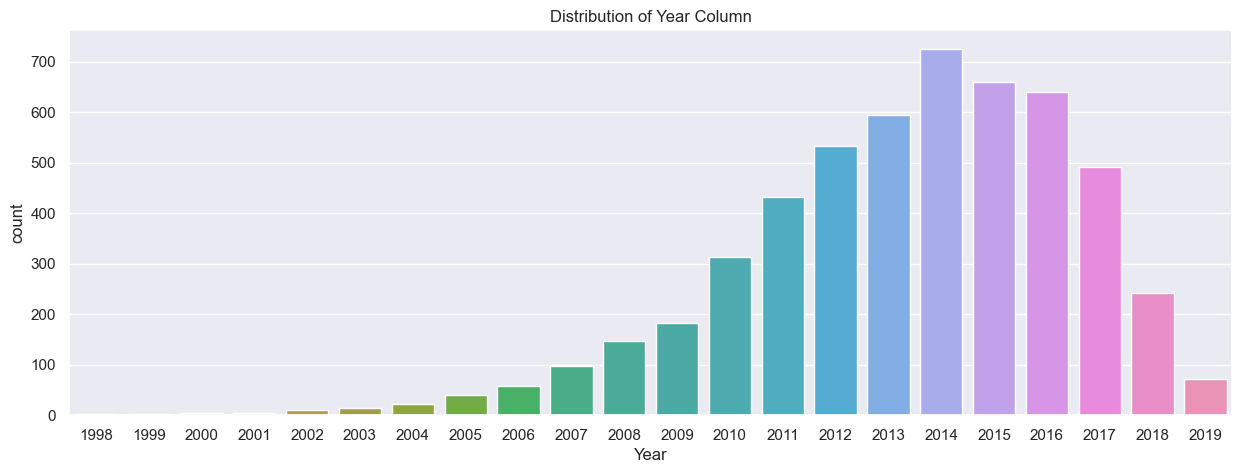

In [20]:
plt.figure(figsize=(15,5))
sns.countplot(df,x='Year');
plt.title('Distribution of Year Column');

##### 2. Kilometers Driven

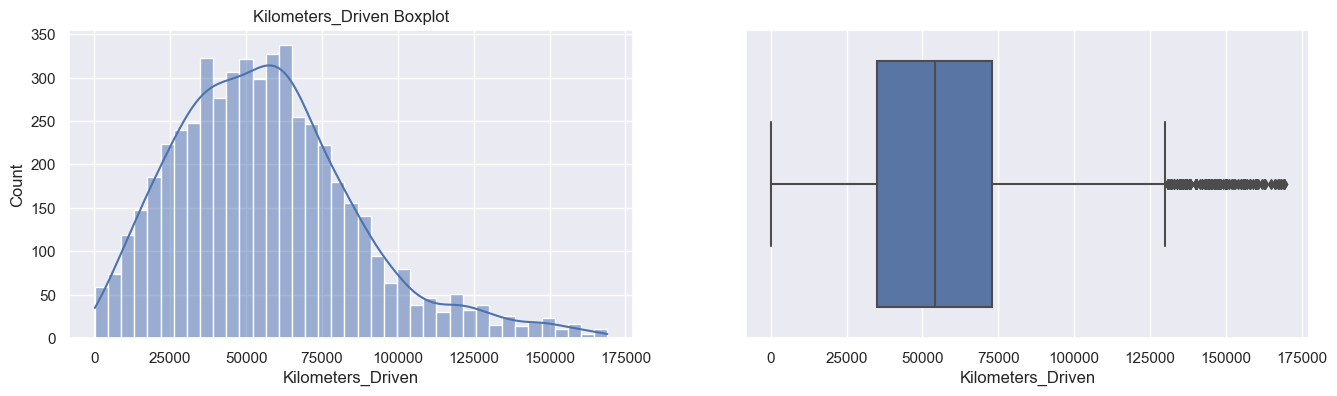

In [21]:
plot_num(df, 'Kilometers_Driven')

##### 3. Fuel Type

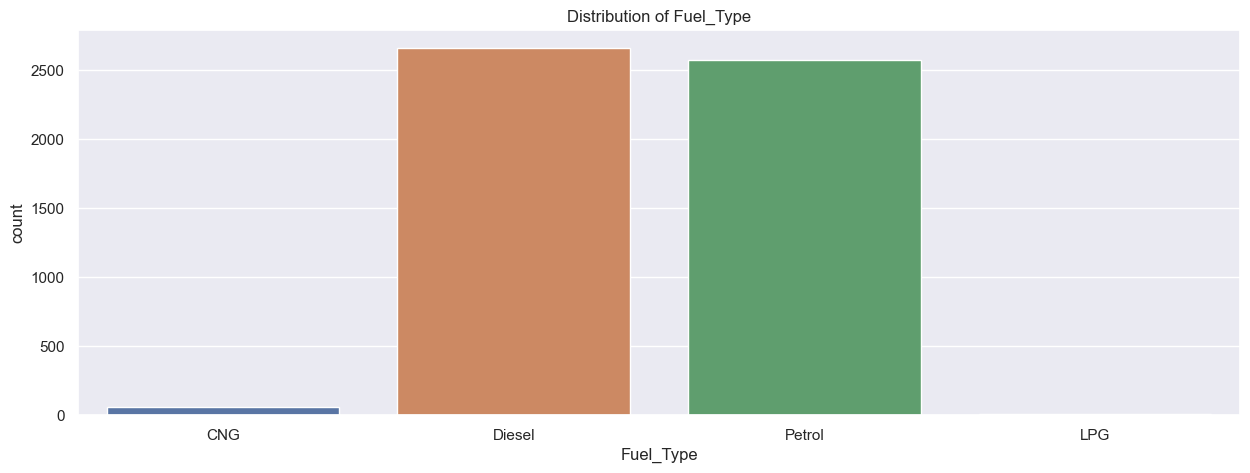

In [22]:
plt.figure(figsize=(15,5))
sns.countplot(df,x='Fuel_Type');
plt.title('Distribution of Fuel_Type');

In [23]:
df['Fuel_Type'].value_counts()

Diesel    2656
Petrol    2573
CNG         55
LPG         10
Name: Fuel_Type, dtype: int64

In [24]:
df = df[~df['Fuel_Type'].isin(['LPG', 'Eletric'])]

##### 4. Transmission

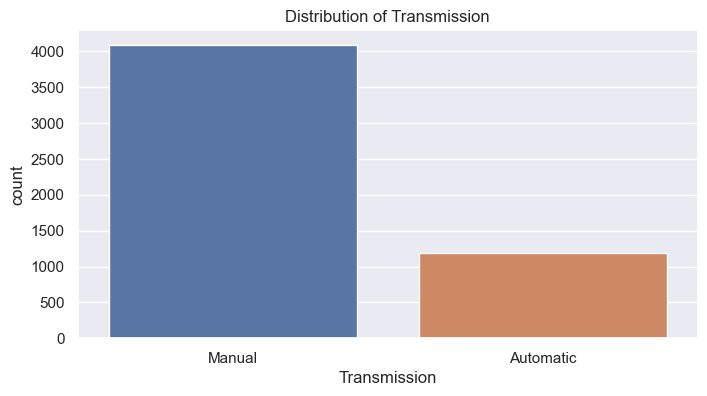

In [25]:
plt.figure(figsize=(8,4))
sns.countplot(df,x='Transmission');
plt.title('Distribution of Transmission');

In [26]:
df['Transmission'].value_counts()

Manual       4090
Automatic    1194
Name: Transmission, dtype: int64

##### 5. Owner Type

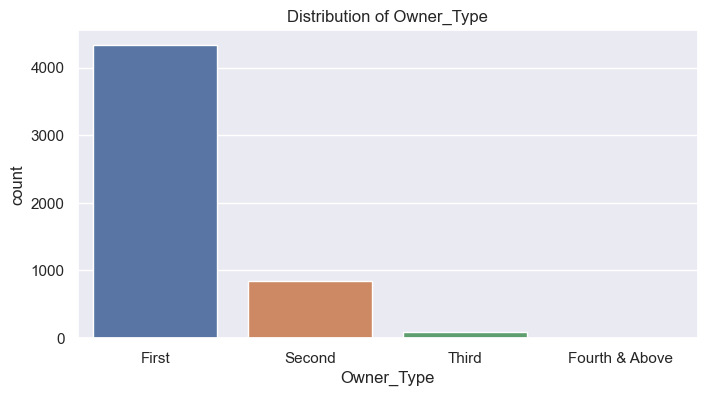

In [27]:
plt.figure(figsize=(8,4))
sns.countplot(df,x='Owner_Type');
plt.title('Distribution of Owner_Type');

In [28]:
df['Owner_Type'] = df['Owner_Type'].map({"First":3, "Second":2, "Third":3, "Fourth & Above":0})

##### 6. Mileage

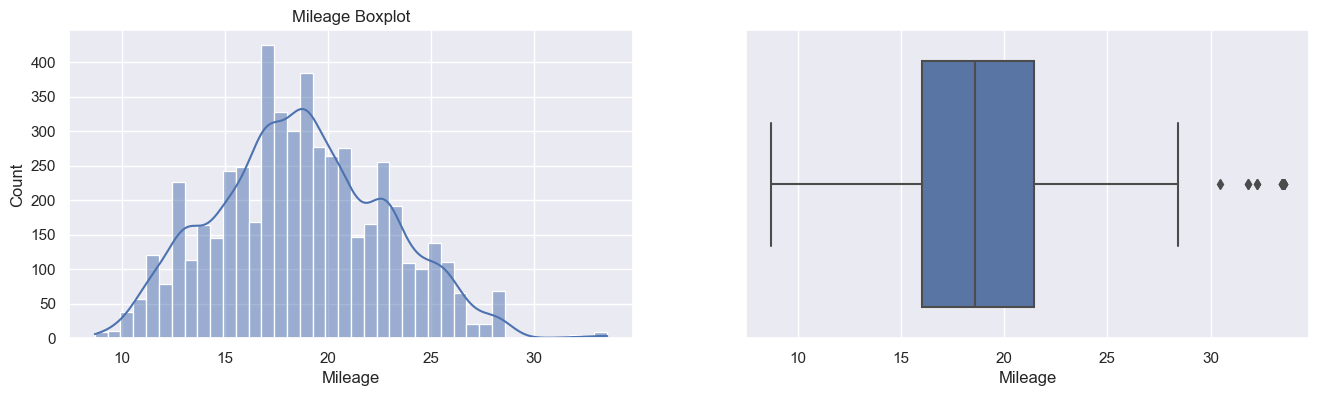

In [29]:
plot_num(df, 'Mileage')

##### 7. Engine

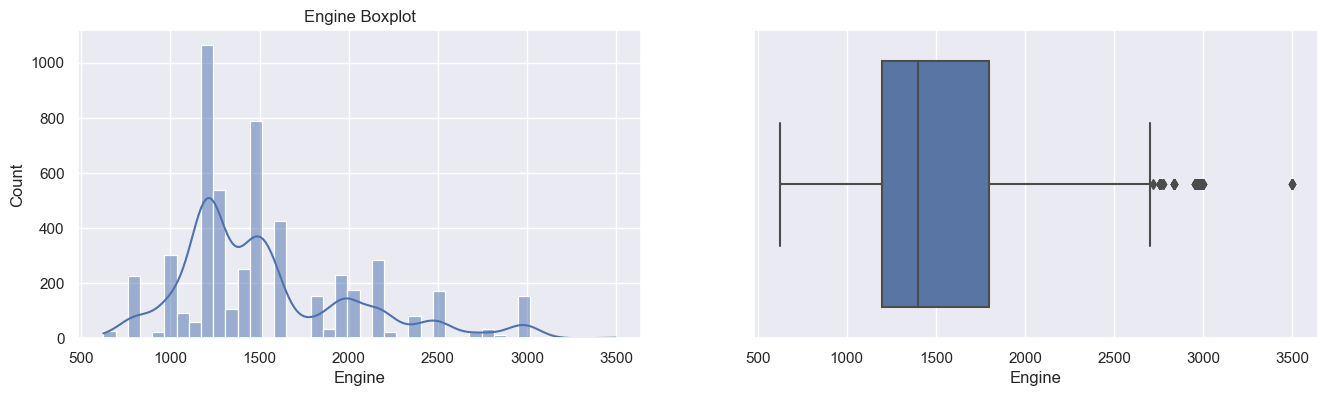

In [30]:
plot_num(df, 'Engine')

##### 8. Power

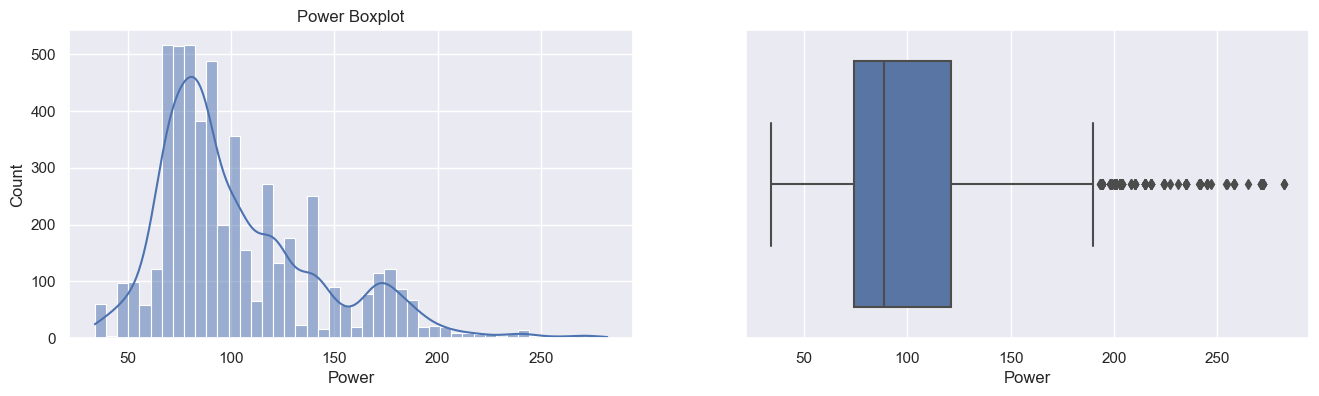

In [31]:
plot_num(df, 'Power')

##### 9. Seats

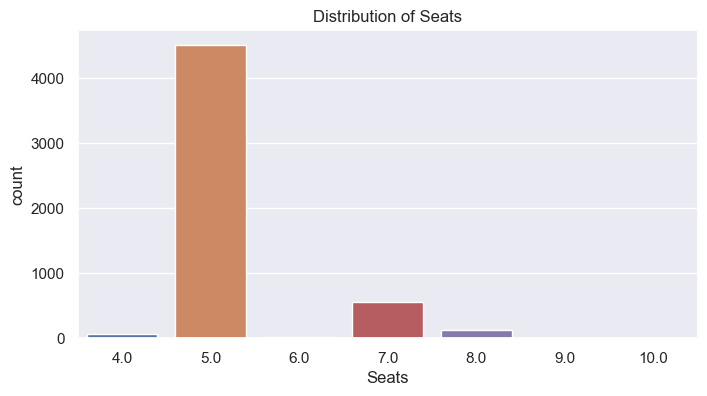

In [32]:
plt.figure(figsize=(8,4))
sns.countplot(df,x='Seats');
plt.title('Distribution of Seats');

In [33]:
df['Seats'].value_counts()

5.0     4509
7.0      558
8.0      121
4.0       62
6.0       26
10.0       4
9.0        3
Name: Seats, dtype: int64

##### -> Teremos que excluir os valores: 4, 6, 10 e 9. Pois possuem pouca participação.

In [34]:
df = df[df.Seats.between(5,8)]

##### 10. Company

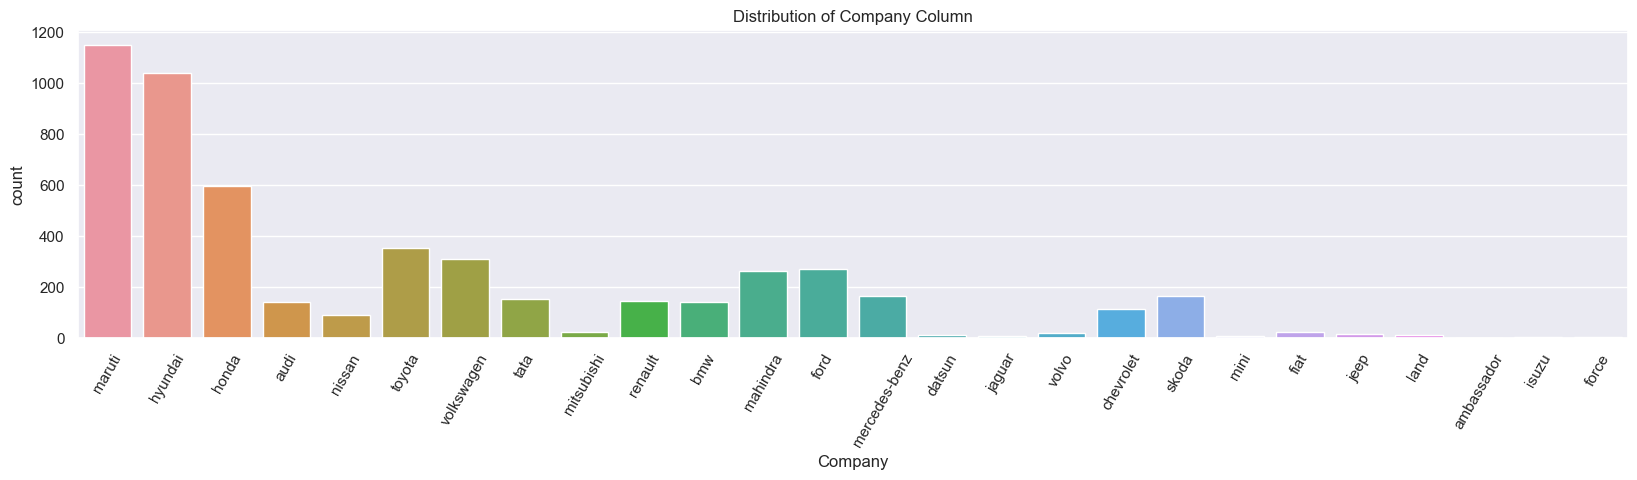

In [35]:
plt.figure(figsize=(20,4))
sns.countplot(df,x='Company');
plt.xticks(rotation=60)
plt.title('Distribution of Company Column');

##### 11. Model

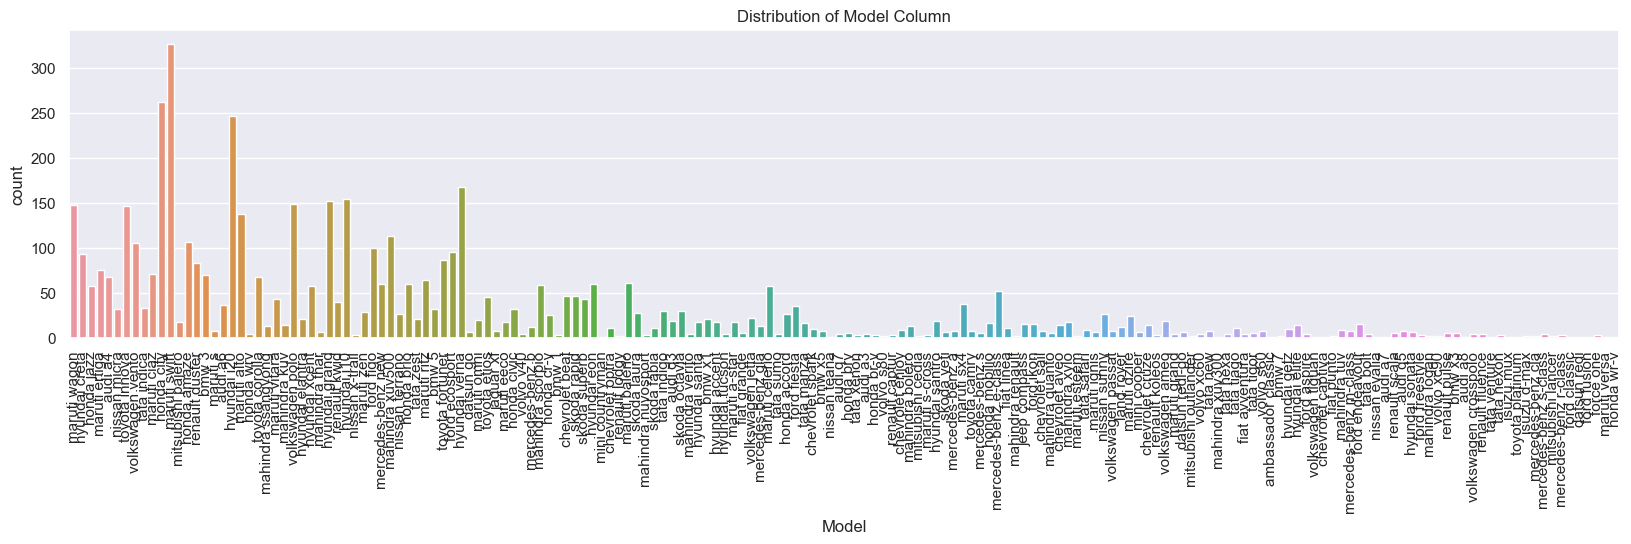

In [36]:
plt.figure(figsize=(20,4))
sns.countplot(df,x='Model',orient='h');
plt.xticks(rotation=90)
plt.title('Distribution of Model Column');

In [37]:
df.Model.value_counts()

maruti swift         326
honda city           262
hyundai i20          246
hyundai verna        168
hyundai i10          154
                    ... 
volkswagen tiguan      1
audi a8                1
chevrolet captiva      1
nissan evalia          1
honda wr-v             1
Name: Model, Length: 176, dtype: int64

In [38]:
threshold = 10
counts = df.Model.value_counts()
to_drop = counts[counts<threshold].index.tolist()
df = df[~df['Model'].isin(to_drop)]

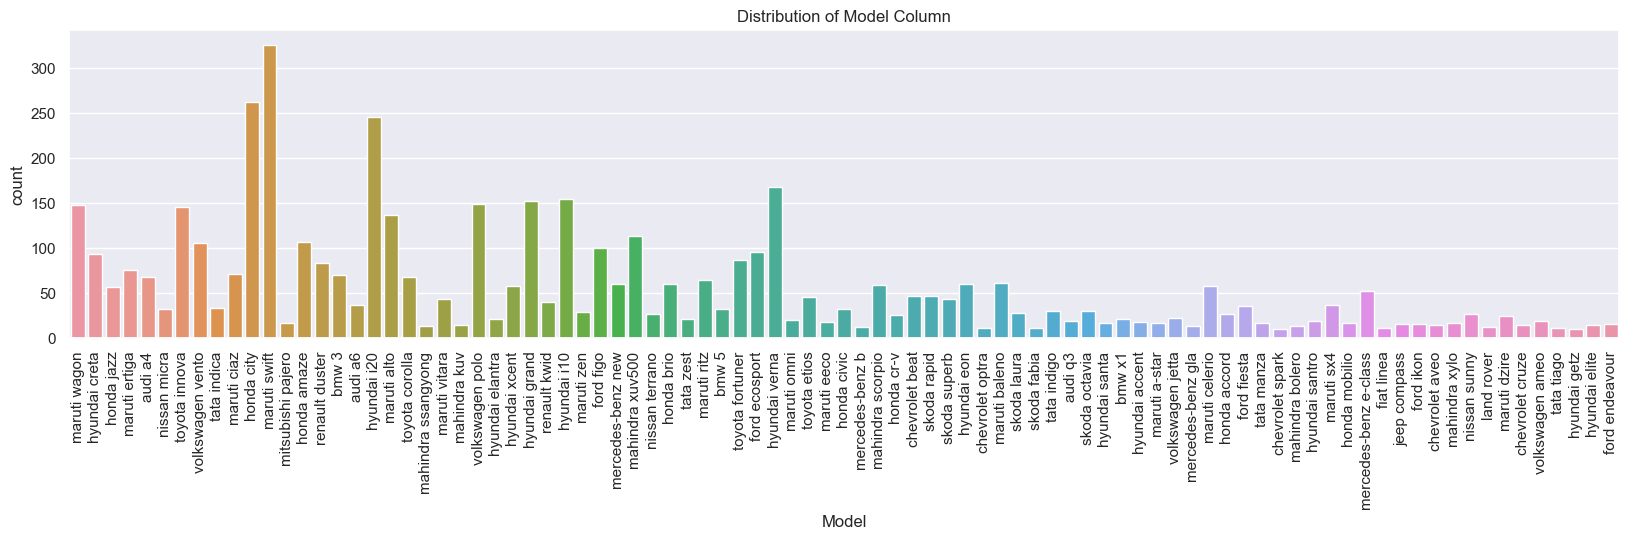

In [39]:
plt.figure(figsize=(20,4))
sns.countplot(df,x='Model',orient='h');
plt.xticks(rotation=90)
plt.title('Distribution of Model Column');

##### 12. Location

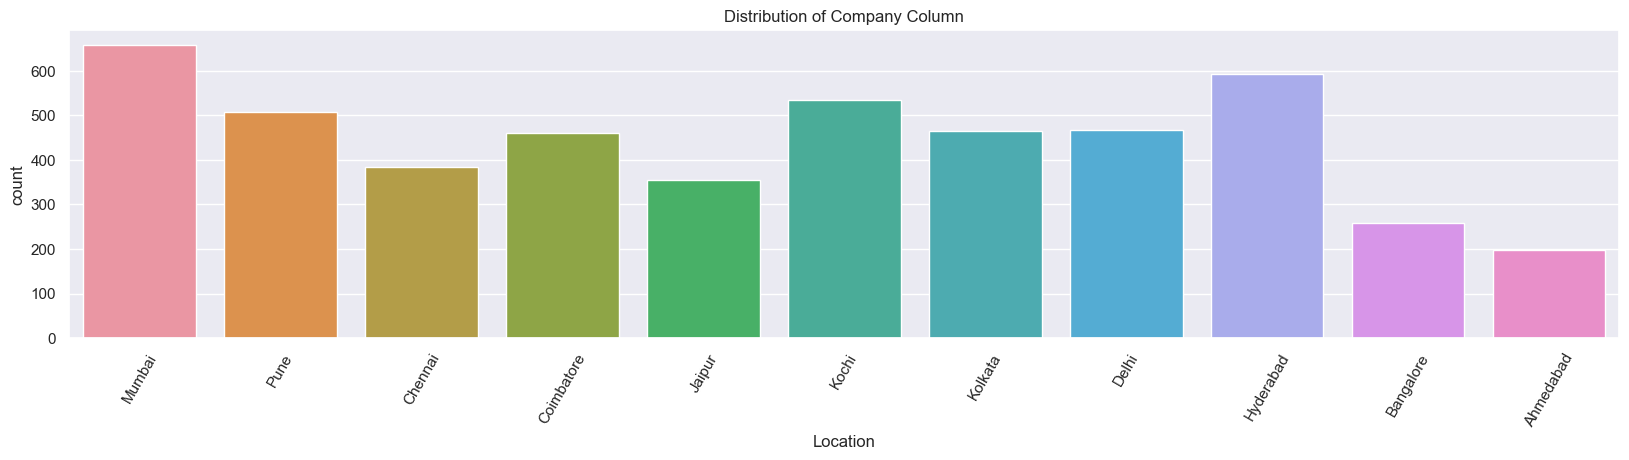

In [40]:
plt.figure(figsize=(20,4))
sns.countplot(df,x='Location');
plt.xticks(rotation=60)
plt.title('Distribution of Company Column');

##### 13. Price

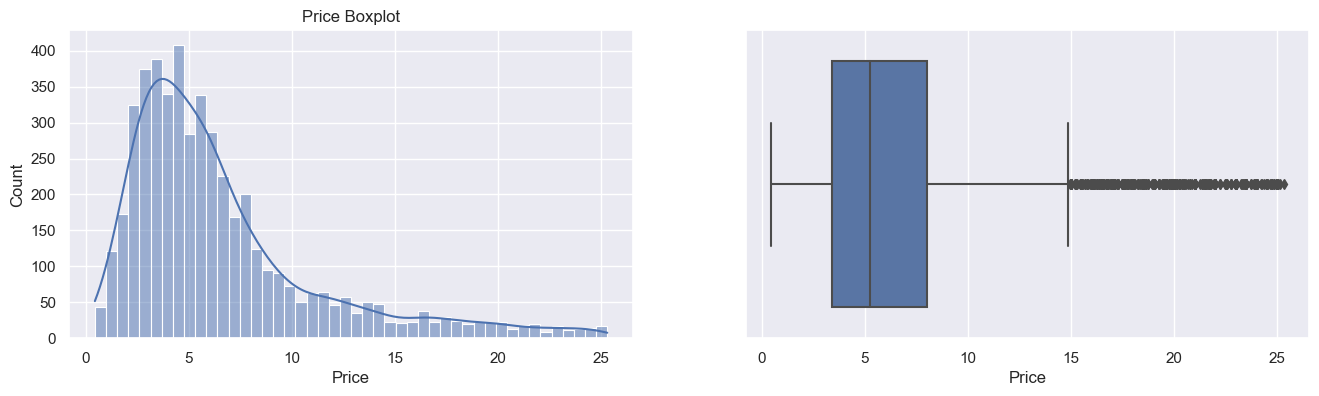

In [41]:
plot_num(df,'Price')

### Bivariant Analysis

#####  1. Year vs Mean Price

In [42]:
agg = df.groupby('Year')['Price'].mean().sort_values(ascending=False)
fig = px.bar(agg, color = agg.index, width=700, height=500, title='Year vs Mean Price')
fig.show()

##### 2. Kilometers Driven vs Price

In [43]:
fig = px.scatter(df,x='Kilometers_Driven',y='Price' , width=700 , height =500,title='Kilometers Driven vs Price')
fig.show()

##### 3. Fuel Type vs Mean Price

In [44]:
agg = df.groupby('Fuel_Type')['Price'].mean().sort_values(ascending = False)
fig = px.bar(agg , color = agg.index , width=700 , height =500,title='Fuel Type vs Mean Price')
fig.show()

##### Transmission Type vs Mean Price

In [45]:
agg = df.groupby('Transmission')['Price'].mean().sort_values(ascending = False)
fig = px.bar(agg, color=agg.index , width=700, height =500, title='Transmission Type vs Mean Price')
fig.show()

##### Owner Type vs Mean Price

In [46]:
agg = df.groupby('Owner_Type')['Price'].mean().sort_values(ascending=False)
fig = px.bar(agg , color = agg.index , width=700 , height =500,title='Owner Type vs Mean Price')
fig.show()

##### Mileage vs Price

In [57]:
fig = px.scatter(df,x='Mileage',y='Price' , width=700 , height =500,title='Mileage vs Mean Price')
fig.show()

##### Engine vs Price

In [48]:
fig = px.scatter(df,x='Engine',y='Price' , width=700 , height =500,title='Engine vs Mean Price')
fig.show()

##### Power vs Price

In [49]:
fig = px.scatter(df,x='Power',y='Price' , width=700 , height =500,title='Power vs Mean Price')
fig.show()

##### Seats vs Mean price

In [50]:
agg = df.groupby('Seats')['Price'].mean().sort_values(ascending=False)
fig = px.bar(agg , color = agg.index , width=700 , height =500,title='Seats vs Mean Price')
fig.show()

##### Company vs Mean Price

In [51]:
agg = df.groupby('Company')['Price'].mean().sort_values(ascending=False)
fig = px.bar(agg , color = agg.index , width=900 , height =700,title='Company vs Mean Price')
fig.show()

##### Location vs Mean Price

In [52]:
agg = df.groupby('Location')['Price'].mean().sort_values(ascending=False)
fig = px.bar(agg , color = agg.index , width=900 , height =700,title='Location vs Mean Price')
fig.show()

##### Heat Map

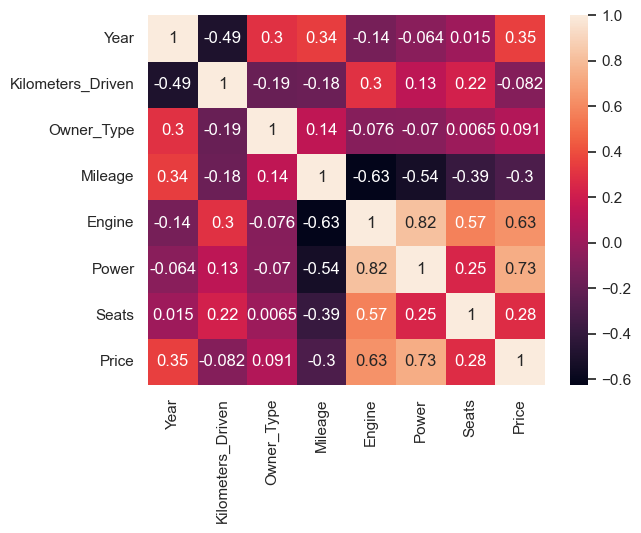

In [53]:
sns.heatmap(df.corr(),annot=True);

### Bulding Model

##### Import sklearn

In [54]:
from sklearn.model_selection import train_test_split,GridSearchCV ,cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression,Ridge ,Lasso 
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler , OneHotEncoder,PolynomialFeatures 
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

In [62]:
features = df.columns.drop(['Price'])
target = ['Price']

X = df[features]
y = df[target]

num_features = X.select_dtypes('number').columns
cat_features = X.select_dtypes('object').columns

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

### Data Preprocessing

In [65]:
#numerical pipeline
num_pipeline = make_pipeline(
                SimpleImputer(),
                StandardScaler(),
                PolynomialFeatures(degree=2)
)
#categorical pipeline
cat_pipeline = make_pipeline(
                SimpleImputer(strategy='most_frequent'),
                OneHotEncoder()
                
)
#full pipeline
preprocessor = make_column_transformer(
                (num_pipeline,num_features),
                (cat_pipeline,cat_features)
)

### Modeling

##### Linear Regression

In [67]:
#Model Building
lin_reg = make_pipeline(
            preprocessor,
            LinearRegression()
    )

In [69]:
#hyperparameter tunning
param_grid = {'columntransformer__pipeline-1__polynomialfeatures__degree':[2,3,4,5,6]}
Grid_search = GridSearchCV(    lin_reg,
                            param_grid = param_grid,
                            cv=5,
                            scoring='r2')
Grid_search.fit(X_train, y_train)
Grid_search.best_params_

{'columntransformer__pipeline-1__polynomialfeatures__degree': 2}

In [70]:
#Model Training
lin_reg.fit(X_train,y_train);

#measuring accuracy
pred_train = lin_reg.predict(X_train)
print("Training set Accuracy:",round(r2_score(pred_train,y_train),4)*100)
print("Testing set Accuracy:",round(lin_reg.score(X_test,y_test),4)*100)

#Cross validation
scores = cross_val_score(lin_reg,X,y,cv=5)
print("CV Scores Mean",round(scores.mean(),4)*100 )
print("CV Scores standard deviation",scores.std() )

Training set Accuracy: 93.99
Testing set Accuracy: 93.26
CV Scores Mean 93.58999999999999
CV Scores standard deviation 0.005728476955471709


### Ridge

In [71]:
#Model Building
ridge = make_pipeline(
            preprocessor,
            Ridge(alpha=0.01)
)

In [72]:
#hyperparameter tunning
param_grid = {'ridge__alpha':[0.01,0.1,1,10,100],
             'columntransformer__pipeline-1__polynomialfeatures__degree':[2,3,4,5,6]}
Grid_search = GridSearchCV(    ridge, 
                               param_grid = param_grid,
                               cv = 5,
                               scoring='r2')
Grid_search.fit(X_train,y_train)
Grid_search.best_params_

{'columntransformer__pipeline-1__polynomialfeatures__degree': 2,
 'ridge__alpha': 0.1}

In [73]:
#Model Training
ridge.fit(X_train,y_train);

#measuring accuracy
pred_train = ridge.predict(X_train)
print("Training set Accuracy:",round(r2_score(pred_train,y_train),4)*100)
print("Testing set Accuracy:",round(ridge.score(X_test,y_test),4)*100)

#Cross validation
scores = cross_val_score(ridge,X,y,cv=5)
print("CV Scores Mean",round(scores.mean(),4)*100 )
print("CV Scores standard deviation",scores.std() )

Training set Accuracy: 93.99
Testing set Accuracy: 93.26
CV Scores Mean 93.58999999999999
CV Scores standard deviation 0.0057428799182359085


### Lasso

In [74]:
#Model Building
lasso = make_pipeline(
        preprocessor,
        Lasso(alpha=0.001)
)

In [75]:
#Hyperparameter Tunning
param_grid={
    "lasso__alpha":[0.001,0.01,0.1,1,10,100],
    "columntransformer__pipeline-1__polynomialfeatures__degree":[2,3,4,5]}
grid_search = GridSearchCV(
            lasso,
            param_grid=param_grid,
            scoring='r2',
            cv=5
)
grid_search.fit(X_train,y_train);
grid_search.best_params_

{'columntransformer__pipeline-1__polynomialfeatures__degree': 2,
 'lasso__alpha': 0.001}